# PROJET RECHERCHE OPERATIONELLE

## LIVERABLE Finale

#### Groupe01: 
- Khireddine Lamine
- Kertous Chiraz
- Assal Naym
- Skander Wassim 
- Guichi Safi

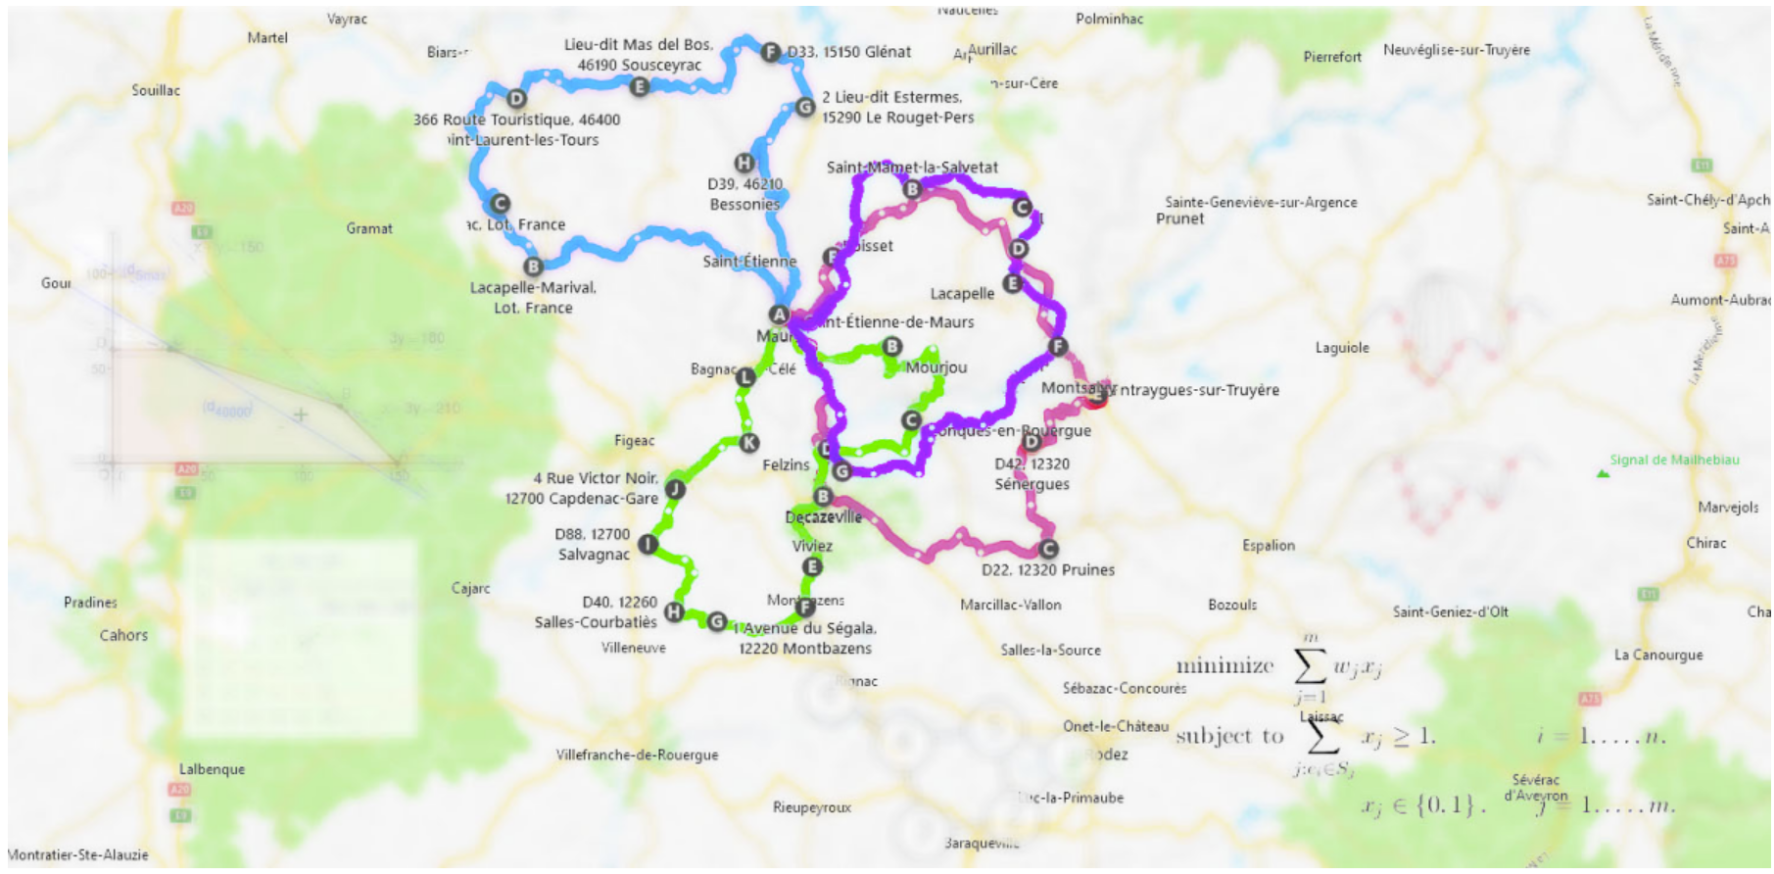

# Introduction

<div style="text-align: justify">
Depuis les années 90, la lutte contre le réchauffement climatique et la réduction des émissions de gaz à effet de serre sont devenues des priorités internationales, avec des engagements tels que le protocole de Kyoto et des objectifs nationaux ambitieux, comme la réduction par quatre des émissions d'ici 2050 en France. Pour contribuer à ces efforts, l'ADEME a lancé un appel à manifestation d'intérêt afin de promouvoir des solutions innovantes de mobilité durable pour les personnes et les marchandises.

<br>CesiCDP, spécialisée dans la mobilité multimodale intelligente, participe à cette initiative en formant une équipe de quatre personnes. L'objectif est de proposer une méthode d'optimisation des tournées de livraison, qui minimise le temps de trajet tout en tenant compte des variations de trafic selon les plages horaires. Ce projet vise à offrir une solution réaliste et efficace, répondant aux défis logistiques actuels tout en respectant les critères environnementaux de l'ADEME.
</div>

## 1. Reformulation du problème
Le problème du voyageur de commerce avec fenêtres de temps (TSP-TW) consiste à trouver une tournée optimale reliant un ensemble de villes, en partant d'une ville de départ, en visitant chaque ville une seule fois, et en revenant à la ville de départ. Contrairement au TSP classique, le TSP-TW inclut des contraintes de temps, où chaque ville doit être visitée dans une période spécifique appelée fenêtre de temps.


- **Problème de décision** : Existe-t-il une tournée qui respecte les fenêtres de temps de chaque ville ?
- **Problème d'optimisation** : Parmi les tournées possibles, quelle est celle qui minimise le coût total (par exemple, la distance ou le temps total de la tournée) tout en respectant les fenêtres de temps ?

## 2. Objectif
Trouver une tournée optimale pour le véhicule qui part de la ville de départ, visite toutes les villes et revient à la ville de départ, tout en minimisant le coût total de la tournée (comme la distance totale ou le temps total parcouru). La tournée doit également respecter les fenêtres de temps de chaque ville, c’est-à-dire qu’elle doit arriver à chaque ville dans son intervalle de temps autorisé.

## 3. Contraintes
Dans ce problème, nous sommes soumis à plusieurs contraintes :

- **Visite unique** : Chaque ville doit être visitée exactement une seule fois par le véhicule.
- **Retour à la ville de départ** : Le véhicule doit commencer et terminer la tournée à partir de la même ville (ville de départ).
- **Respect des fenêtres de temps** : Chaque ville possède une fenêtre de temps pendant laquelle elle doit être visitée. Le véhicule ne peut pas arriver à une ville avant l'ouverture de sa fenêtre de temps et ne peut pas y arriver après la fermeture.



## 4. Modélisation du problème

### 4.1 Modélisation graphique 

Nous modélisons ce problème par un graphe non orienté et pondéré $G = (V, E, P)$, où :

- Les **sommets** $V$ représentent les villes à visiter,
- Les **arêtes** $E$ représentent les routes entre les villes,
- Les **poids des arêtes** $P$ représentent les temps de trajets fixes nécessaires pour parcourir chaque route entre deux villes.

Deux sommets $i$ et $j$ sont reliés par une arête $(i, j)$ si leurs villes correspondantes sont connectées par une route.

### Les composants du graphe

#### 1. Les sommets

- L'ensemble des sommets est $V = \{0, 1, \dots, n\}$, où :
  - $0$ représente le dépôt (ou point de départ et d'arrivée),
  - ${1, \dots, n}$ représentent les villes à visiter.

#### 2. Les arêtes

- L'ensemble des arêtes est défini comme $E = \{(i, j) \mid i \neq j, \, i, j \in V\}$, où chaque arête $(i, j)$ relie deux villes $i$ et $j$, représentant un trajet possible entre deux villes distinctes.

#### 3. Les poids des arêtes

- À chaque arête $(i, j)$ est associé un poids $t_{ij}$ représentant le temps de trajet fixe pour parcourir la route entre les villes $i$ et $j$. 

### Contrainte de fenêtre de temps 

Chaque ville $i$ ($i \in \{1, \dots, n\}$) possède une **fenêtre de temps** définie par un intervalle $[e_i, l_i]$ :

- $e_i$ représente le moment d'ouverture de la fenêtre de temps de la ville $i$, avant lequel elle ne peut pas être visitée,
- $l_i$ représente le moment de fermeture de cette fenêtre, après lequel elle ne peut plus être visitée.

Ces contraintes imposent que le véhicule doit arriver dans la ville $i$ à un moment $t$ tel que $e_i \leq t \leq l_i$.

### Objectif 

L’objectif du Problème du Voyageur de Commerce avec Fenêtres de Temps (TSP-TW) est de trouver une tournée optimale $\pi = (0, i_1, i_2, \dots, i_n, 0)$ qui :

- Relie tous les sommets du graphe,
- Commence et se termine au dépôt $0$,
- Passe par chaque sommet $i \in V$ une unique fois,
- Respecte les fenêtres de temps de chaque ville,
- Minimise le temps total de la tournée.

Le problème prend en compte les contraintes temporelles imposées par les fenêtres de temps, ce qui peut nécessiter des périodes d’attente si le véhicule arrive avant l’ouverture de la fenêtre $e_i$.

### 4.2 Modélisation mathématique (linéaire)

Nous modélisons ce problème comme un système d'optimisation linéaire sans dépendance temporelle, avec des temps de trajet constants entre les villes et des fenêtres de temps pour chaque visite.

### Variables de déscision

- $x_{ij} \in \{0, 1\}$ : Variable binaire indiquant si l'arête reliant les villes $i$ et $j$ est empruntée ($x_{ij} = 1$) ou non ($x_{ij} = 0$).
- $t_i$ : Heure d'arrivée à la ville $i$.

### Fonction Objectif

La fonction objectif du **TSP avec fenêtres de temps (TSP-TW)** cherche à minimiser le **coût total de la tournée** (ou le temps total de trajet) en respectant les fenêtres de temps associées à chaque ville.

$$
\min \sum_{i=1}^{n} \sum_{j=i+1}^{n} t_{ij} \cdot x_{ij}
$$

### Contraintes

#### 1. Visite unique : 
Chaque ville doit être visitée exactement une seule fois. Cela signifie qu'il doit y avoir exactement deux arêtes incidentes à chaque ville (une pour entrer et une pour sortir).

$$
\sum_{j=1, j \neq i}^{n} x_{ij} = 2 \quad \forall i = 1, \dots, n
$$

#### 2. Sous-tournées (Miller-Tucker-Zemlin, MTZ)
Pour éviter les sous-tournées (ou sous-cycles), cette variation des contraintes MTZ impose une relation entre les positions des villes dans la tournée. Cela nécessite l'utilisation de variables auxiliaires $u_i$ pour représenter la position de la ville $i$ dans la tournée :

$$
u_1 = 1, \quad u_i \in \{2, \dots, n\} \quad \forall i = 2, \dots, n
$$

$$
u_i - u_j + 1 \leq (n - 1)(1 - x_{ij}) \quad \forall i, j = 2, \dots, n
$$

Où $u_i$ est une variable continue représentant la position de la ville $i$ dans la tournée, et $n$ est le nombre total de villes.

#### 3. Fenêtres de temps :
Chaque ville $i$ doit être visitée à un moment $t_i$ qui respecte sa fenêtre de temps $[e_i, l_i]$ :

$$
e_i \leq t_i \leq l_i \quad \forall i \in V
$$

#### 4. Temps de trajet fixe : 
Le temps d'arrivée à la ville $j$ après avoir quitté la ville $i$ doit inclure le temps de trajet $t_{ij}$ si le trajet entre $i$ et $j$ est emprunté :

$$
t_j \geq t_i + t_{ij} \cdot x_{ij} \quad \forall i, j \in V
$$

#### 5. Binarité : 
Les variables $x_{ij}$ sont binaires, ce qui signifie que chaque arête est soit empruntée (valeur 1), soit non empruntée (valeur 0) :

$$
x_{ij} \in \{0, 1\} \quad \forall i, j
$$
## 5.Analyse de la complexité

Dans cette étude, nous examinons la complexité du problème d'optimisation des tournées de livraison, en intégrant les contraintes de fenêtres de temps pour chaque livraison. Cette contrainte se divise en deux aspects fondamentaux :

- **Interdiction de livrer hors de la fenêtre de temps** : Chaque livraison doit être effectuée dans une plage horaire définie, sans possibilité de déroger à cette règle.
- **Possibilité d'attendre sur place** : Si un véhicule arrive avant l'ouverture de la fenêtre temporelle, il peut attendre sur place jusqu'à l'ouverture de la fenêtre.

Bien que l'objectif principal soit de minimiser le temps de trajet total, l'ajout de fenêtres temporelles complique le processus de planification. Non seulement il faut établir un chemin efficace reliant toutes les destinations, mais il faut également s'assurer que chaque livraison respecte les horaires imposés.

Nous abordons ainsi le **Problème du Voyageur de Commerce avec Fenêtres Temporelles (TSP-TW)**, une variante du problème classique du voyageur de commerce (TSP). Cette version est plus complexe car elle nécessite une approche algorithmique avancée pour gérer les contraintes temporelles tout en optimisant les tournées de livraison. L’étude de ce problème est essentielle pour développer des solutions logistiques qui répondent aux exigences croissantes en matière de précision et d’efficacité dans la livraison.

### 5.1 Étude de la complexité

### Formulation du Problème

Le TSP-TW peut être formulé comme suit :
- **Objectif** : Trouver un circuit qui commence et se termine au même point (le dépôt), en visitant chaque ville exactement une fois et en minimisant le coût total du circuit.
- **Contraintes** : En plus de l'exigence de visiter chaque ville, le problème doit respecter les fenêtres de temps pour chaque livraison. Cela signifie que pour chaque ville $v_i$, il existe une fenêtre de temps $[a_i, b_i]$ pendant laquelle la livraison doit être effectuée. Si un véhicule arrive à $v_i$ avant $a_i$, il doit attendre l'ouverture de la fenêtre.

### Appartenance à NP

Un problème appartient à la classe NP s'il est possible de vérifier en temps polynomial si une solution donnée est correcte. En d'autres termes, même si le problème est difficile à résoudre, il doit être facile de vérifier qu'une solution proposée est valide.

Le TSP-TW appartient à la classe NP, car il est possible de vérifier rapidement, en temps polynomial, si une solution proposée est valide :
- **Visite unique de chaque ville** : Pour toute tournée donnée, on peut parcourir la liste des villes et vérifier que chaque ville est visitée exactement une fois. Cette opération prend un temps $O(n)$, où $n$ est le nombre de villes.
- **Retour au point de départ** : On vérifie que le dernier point visité dans le circuit est le même que le point de départ. Cette vérification peut être effectuée en un temps constant $O(1)$.
- **Calcul du coût total** : Pour calculer le coût total du circuit, il faut sommer les distances entre les villes dans l'ordre du circuit. Cela nécessite de parcourir la liste des villes, ce qui prend également un temps $O(n)$.
- **Vérification des fenêtres de temps** : Pour chaque livraison, il est nécessaire de vérifier que la livraison est effectuée dans la fenêtre de temps spécifiée. Cette vérification prend un temps $O(n)$, car elle nécessite une vérification pour chaque ville.

En résumé, la vérification de chaque condition peut être réalisée en un temps polynomial. Cela permet de conclure que, même si le TSP-TW est difficile à résoudre, vérifier une solution donnée peut se faire en temps polynomial, classant ainsi le problème dans la classe NP.

### NP-difficulté

Pour montrer que le **TSP avec fenêtres temporelles (TSP-TW)** est NP-difficile, il est nécessaire de démontrer que ce problème est au moins aussi difficile qu'un autre problème reconnu comme NP-difficile. La démonstration se fait en général par une **réduction d'un problème NP-difficile au TSP-TW**, en prouvant qu'une solution pour le TSP-TW pourrait également résoudre ce problème NP-difficile.

### Réduction du Problème de 3-Partition au TSP-TW

Le **problème de 3-Partition** est un problème bien connu en théorie de la complexité et appartient à la classe NP-difficile. Pour démontrer que le TSP-TW est également NP-difficile, on peut procéder à une réduction du problème de 3-Partition au TSP-TW de la manière suivante :

#### 1. Définition du 3-Partition : 
Ce problème consiste à partitionner un ensemble de \(3n\) éléments en \(n\) sous-ensembles de trois éléments, chacun ayant une somme égale à une valeur donnée \(B\).
  
#### 2. Construction de l'Instance TSP-TW :
  - **Création des villes** : Chaque élément \(a_i\) de l'ensemble à partitionner correspond à une ville \(v_i\) dans le TSP-TW.
  - **Attribution des distances** : Les distances entre les villes sont ajustées pour refléter la possibilité de former des groupes de trois éléments totalisant \(B\). Les distances sont faibles entre les villes pouvant former de tels groupes et élevées entre celles qui ne peuvent pas.
  - **Fenêtres de temps** : Des fenêtres de temps sont définies de manière à forcer les livraisons à se faire dans un ordre spécifique, rendant impossible toute solution qui ne respecte pas la structure de sous-ensembles de 3-Partition.

#### 3.  Relation entre les Problèmes :
  - **Existence d'une solution pour le TSP-TW** : Si une solution existe pour le TSP-TW, alors il est possible de réaliser toutes les livraisons tout en respectant les fenêtres de temps. Cela prouve que les éléments peuvent être regroupés de manière à satisfaire la condition de somme \(B\).
  - **Existence d'une solution pour le 3-Partition** : Inversement, si les éléments de l'ensemble peuvent être regroupés selon les règles du 3-Partition, une tournée de livraison respectant les fenêtres de temps peut être construite dans le TSP-TW.

### Conclusion : NP-complétude du TSP-TW

En combinant les résultats obtenus, nous pouvons conclure que le **TSP avec fenêtres temporelles (TSP-TW)** est un problème **NP-difficile**. Puisque nous avons également démontré que le TSP-TW appartient à la classe NP (en vérifiant la validité d'une solution en temps polynomial), cela signifie que le **TSP-TW est NP-complet**

## 6
1. [A study on optimization models for the vehicle routing problem with time windows](https://www.sciencedirect.com/science/article/pii/S2212567115009260) 
2. [Optimization model for solving the traveling salesman problem with time windows](https://optimization-online.org/wp-content/uploads/2018/05/6640.pdf) 
3. [The Traveling Salesman Problem: A Computational Study](https://link.springer.com/book/10.1007/978-3-319-33954-2) 
4. [Integer programming formulation for the traveling salesman problem](https://math.stackexchange.com/questions/3032648/how-do-i-use-an-integer-programmed-mathematical-modelling-of-tsp-travelling-sal) 
5. [An analysis of the traveling salesman problem with time windows](https://www.jstage.jst.go.jp/article/easts/9/0/9_0_702/_pdf) (page 703) 
6. [Introduction to Graphs: Traveling Salesman Problem](https://sites.math.washington.edu/~conroy/m381-general/lectureSlides/lecGraphs03.pdf) 
7. [Linear Programming Lecture 28: TSP](https://facultyweb.kennesaw.edu/mlavrov/courses/lp/lecture28.pdf)ture28.pdf).

# Implémentation du TSP avec Python

Pour résoudre ce problème, nous avons choisi d’adopter une approche basée sur la **programmation orientée objet (POO)**. Ce paradigme de programmation s’est avéré particulièrement adapté en raison de la nature complexe et modulaire du problème à traiter.  

En utilisant la POO, nous avons pu modéliser les différents éléments du problème sous forme de classes et d'objets, ce qui permet une organisation claire et structurée du code. Voici comment cela a été appliqué :  

1. **Modélisation des entités :**  
   - Chaque "lapin" correspond à un itinéraire potentiel, représenté par une classe `Lapin`. Cette classe contient des méthodes pour calculer la distance du circuit, appliquer des mutations et effectuer des croisements avec d'autres circuits.  
   - La forêt, qui représente le graphe complet, est modélisée dans une classe `Foret`. Elle contient les informations sur la matrice de distances et les contraintes, ainsi que les fonctions principales de l'algorithme génétique.  

2. **Encapsulation des données et des comportements :**  
   - Les données (comme les circuits, les distances et les fenêtres de temps) sont encapsulées dans les classes, ce qui réduit les risques d'erreurs et facilite la gestion des dépendances.  
   - Les comportements associés (comme le calcul des distances, les mutations, ou les croisements) sont intégrés sous forme de méthodes au sein des classes correspondantes, assurant une séparation claire des responsabilités.  

3. **Réutilisabilité et extensibilité :**  
   - La POO nous permet de réutiliser facilement les classes et de les étendre si de nouvelles fonctionnalités ou contraintes devaient être ajoutées. Par exemple, il est possible d’ajouter d’autres types de mutations ou des contraintes supplémentaires en modifiant ou en dérivant des classes existantes.  

4. **Gestion des contraintes :**  
   - Les contraintes de fenêtres de temps sont directement intégrées dans les méthodes des classes. Cela permet de vérifier facilement la validité des circuits tout en respectant les règles du problème.  

In [63]:
class Foret: #le graphe
    def __init__(self, matrice):
        self.foret = matrice    # matrice représentant la foret
        self.taille = len(matrice)
        self.sommets = [i for i in range(len(matrice))] # liste contenant les différents points d'alimentation
        self.lapins = [] # liste de la population
        
    def initialisationPopulation(self, taillePop):
        self.lapins = []
        for i in range(taillePop):
            circuit = list(range(1, self.taille))
            random.shuffle(circuit)
        self.lapins.append(Lapin(circuit))
        
        
class Lapin:
    def __init__(self, circuit):
        self.circuit = circuit
        self.nombrePoints = len(circuit)
        
    def __repr__(self):
        return str(self.circuit)
    
    def calculate_distance(self, distance_matrix):
        distance = sum(distance_matrix[self.circuit[i], self.circuit[i + 1]]
                       for i in range(len(self.circuit) - 1))
        return distance + distance_matrix[self.circuit[-1], self.circuit[0]]

Dans un algorithme génétique, les processus de croisement (accouplement) et de mutation sont essentiels pour simuler la reproduction et l'évolution des individus d'une population. Ici, pour l'exemple des lapins, nous allons implémenter deux fonctions :

**Accouplement (croisement)** : Cette méthode combine deux individus (représentant deux lapins) pour créer un ou plusieurs nouveaux individus. L'idée est de mélanger les "gènes" des deux parents de manière à créer un enfant qui hérite de traits des deux. En pratique, cela se fait souvent par échange de parties du code génétique (généralement représenté sous forme de chaînes de bits ou d'entiers).
Dans notre code, l'accouplement consiste à ce qu'un segment du circuit (ou de la solution) d'un parent soit copié dans l'enfant, et les gènes restants soient remplis avec les gènes du second parent. Cela permet d'explorer de nouvelles combinaisons de solutions.

**Mutation** : Cette méthode introduit des changements aléatoires dans le génome d'un individu (représenté aussi par une chaîne de bits ou d'entiers), afin de maintenir la diversité génétique de la population et éviter que l'algorithme ne se "bloque" dans une solution locale optimale.

<blockquote class="comment">
<strong style="text-decoration:underline;display:block"></strong>
<ul>
    <li><strong>Mutation par échange (swap mutation)</strong> : La mutation introduit une variation aléatoire dans un individu. Ici, deux éléments du circuit sont échangés pour modifier la solution et éviter que l'algorithme ne se "bloque" dans une solution locale.</li><br/>
    <li><strong>Mutation 2-opt</strong> : Cette mutation vise à améliorer le chemin en inversant une sous-section du circuit, ce qui peut réduire la distance parcourue dans des problèmes comme le "Voyageur de commerce". Elle permet d’optimiser localement la solution en éliminant les intersections de chemins.</li>
</ul>
</blockquote>

In [66]:
class Lapin:
    def __init__(self, circuit):
        self.circuit = circuit
        self.nombrePoints = len(circuit)
       
    def __repr__(self):
        return str(self.circuit)
    
    def calculate_distance(self, distance_matrix):
        distance = sum(distance_matrix[self.circuit[i], self.circuit[i + 1]]
                       for i in range(len(self.circuit) - 1))
        return distance + distance_matrix[self.circuit[-1], self.circuit[0]]
  
    def accouplement(self, lapin):
        child = [None] * self.nombrePoints
        # Choisir les indices de croisement
        start, end = sorted(random.sample(range(self.nombrePoints), 2))
    
        # Copier la section du parent 1 dans le child
        child[start:end] = self.circuit[start:end]
    
        # Créer un set des gènes déjà utilisés dans le child
        used_genes = set(self.circuit[start:end])
    
        # Remplir les gènes restants avec ceux du parent 2
        current_pos = end % self.nombrePoints
        for point in lapin.circuit:
            if point not in used_genes:
                child[current_pos] = point
                used_genes.add(point)
                current_pos = (current_pos + 1) % self.nombrePoints
        return Lapin(child)
       
    def swap_mutation(self):
        size = (self.nombrePoints)
        idx1, idx2 = random.sample(range(size), 2)
        self.circuit[idx1], self.circuit[idx2] = self.circuit[idx2], self.circuit[idx1]
            
    def two_opt_mutation(self):
        """Perform a 2-opt mutation, which swaps two edges to reduce the path distance."""
        i, j = sorted(random.sample(range(1, len(self.circuit)), 2))
        self.circuit[i:j] = reversed(self.circuit[i:j])


Notre algorithme génétique commence par initialiser une population de solutions potentielles (lapins), chaque individu représentant un circuit ou chemin à optimiser. À chaque génération, les individus sont triés par performance (fitness), mesurée ici par la distance totale de leur circuit. Les meilleurs individus sont préservés grâce à l'élitisme, qui conserve un certain pourcentage des solutions les plus performantes pour la génération suivante. Ensuite, des parents sont sélectionnés parmi les meilleurs individus, et un croisement (accouplement) est effectué pour produire de nouveaux enfants, combinant les traits des deux parents. Afin de maintenir la diversité et d'éviter les blocages dans des solutions sous-optimales, des mutations aléatoires sont appliquées à certains enfants, soit en échangeant deux éléments d'un circuit, soit en inversant une sous-section (mutation 2-opt). La nouvelle population ainsi générée remplace l'ancienne, et ce processus se répète sur un nombre prédéfini de générations.

In [69]:
class Foret: #le graphe
    def __init__(self, matrice):
        self.foret = matrice    # matrice représentant la foret
        self.taille = len(matrice)
        self.sommets = [i for i in range(len(matrice))] # liste contenant les différents points d'alimentation
        self.lapins = [] # liste de la population
        
    def initialisationPopulation(self, taillePop):
        self.lapins = []
        for i in range(taillePop):
            circuit = list(range(1, self.taille))
            random.shuffle(circuit)
        self.lapins.append(Lapin(circuit))
        
    def genetic_algorithm(self, generations, taillePop, mutation_rate, elitism_ratio=0.1):
        self.initialisationPopulation(taillePop)
    
        for generation in range(generations):
            new_population = []
            best_distance = float('inf')
    
            # Trier la population par fitness (distance)
            self.lapins.sort(key=lambda x: x.calculate_distance(self.foret))
    
            # Garder les meilleurs individus (elitisme)
            num_elites = int(taillePop * elitism_ratio)
            elites = self.lapins[:num_elites]
            new_population.extend(elites)
    
            # Sélectionner les parents parmi les meilleures solutions
            while len(new_population) < taillePop:
                parent1 = random.choice(self.lapins[:taillePop//2])  # Sélection parmi les meilleurs
                parent2 = random.choice(self.lapins[:taillePop//2])
                child = parent1.accouplement(parent2)
    
                # Mutations
                if random.random() < mutation_rate:
                    if random.random() < 0.5:
                        child.swap_mutation()  # Mutation par échange
                    else:
                        child.two_opt_mutation()  # Mutation par 2-opt
    
                new_population.append(child)
    
            # Mise à jour de la population
            self.lapins = new_population
    
            # Calculer le meilleur individu de cette génération
            best_circuit = min(self.lapins, key=lambda x: x.calculate_distance(self.foret))
            best_distance = best_circuit.calculate_distance(self.foret)

    
        # Trouver le meilleur circuit global
        best_circuit = min(self.lapins, key=lambda x: x.calculate_distance(self.foret))
        best_distance = best_circuit.calculate_distance(self.foret)
        return best_circuit, best_distance

Pour poursuivre l'implémentation de l'algorithme génétique, il est nécessaire de disposer d'une **matrice de distances** qui représente les distances entre les différents points du problème (par exemple, les villes dans le problème du voyageur de commerce). Cette matrice est essentielle car elle sert à calculer la **fitness** (distance totale) de chaque circuit. 

Deux options principales s'offrent à nous : 

1. **Génération d'une matrice aléatoire** : Cette approche consiste à créer une matrice symétrique (ou asymétrique selon le problème) avec des distances générées aléatoirement. Chaque entrée de la matrice représente la distance entre deux points, et les valeurs sont choisies dans une plage prédéfinie (par exemple, entre 1 et 100). Cela est utile pour tester l'algorithme sur des instances de problèmes générées dynamiquement.

2. **Extraction d'une matrice depuis un benchmark** : Une autre option consiste à utiliser des matrices issues de benchmarks standards, tels que les datasets fournis pour les problèmes du voyageur de commerce (comme ceux du **TSPLIB**). Ces matrices sont réalistes et permettent de tester l'algorithme sur des exemples connus et comparables avec d'autres approches. Cela aide à évaluer la performance de l'algorithme dans des conditions standards.

Une fois la matrice obtenue (générée ou extraite), elle servira de base pour calculer les distances des circuits, qui sont ensuite utilisées dans l'évaluation des individus lors de l'algorithme génétique.

In [72]:
import numpy as np
import random 

#Génération d'une matrice aléatoire

def ForetMatAleatoire(taille):
    # on génère une matrice aléatoire avec des distances entre 1 et 20
    b = np.random.randint(50, 100, (taille, taille)).astype(int)

    # On garde les distances symétriques et on met les diagonales à 0
    for i in range(taille):
        b[i][i] = 0
        for j in range(i+1, taille):
            b[j][i] = b[i][j]
            
    return b

#Extraction d'une matrice depuis un benchmark

def lire_coordonnees(fichier):
    with open(fichier, 'r') as f:
        lignes = f.readlines()
    
    # Extraire les coordonnées
    coordonnees = []
    fenetres = []
    for ligne in lignes:
        parts = ligne.strip().split()
        
        try:
            if(float(parts[0]) == 999): break
            x = float(parts[1])  # XCOORD
            y = float(parts[2])  # YCOORD
            coordonnees.append((x, y))
        except (IndexError, ValueError):
            # Ignorer les lignes non valides
            continue

    return coordonnees

def generer_matrice_distances(coordonnees):
    taille = len(coordonnees)
    matrice_distances = np.zeros((taille, taille))
    
    # Calcul des distances euclidiennes
    for i in range(taille):
        for j in range(i + 1, taille):
            x1, y1 = coordonnees[i]
            x2, y2 = coordonnees[j]
            distance = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
            matrice_distances[i][j] = distance
            matrice_distances[j][i] = distance  # Matrice symétrique
    
    return matrice_distances

Pour pouvoir voir l'évolution de notre solution au fil des générations il est nécessaire d'ajouter une sortie à la méthode `genetic_algorith`.
On ajoutera un liste nommée `evol` qui enregistera à chaque génération la meilleure distance obtenue.

In [75]:
class Foret: #le graphe
    def __init__(self, matrice):
        self.foret = matrice    # matrice représentant la foret
        self.taille = len(matrice)
        self.sommets = [i for i in range(len(matrice))] # liste contenant les différents points d'alimentation
        self.lapins = [] # liste de la population
        
    def initialisationPopulation(self, taillePop):
        self.lapins = []
        for i in range(taillePop):
            circuit = list(range(1, self.taille))
            random.shuffle(circuit)
        self.lapins.append(Lapin(circuit))


    def genetic_algorithm(self, generations, taillePop, mutation_rate, elitism_ratio=0.1):
            self.initialisationPopulation(taillePop)
            evol = [] # liste qui contiendra le meilleur individu par génération

            for generation in range(generations):
                new_population = []
                best_distance = float('inf')

                # Trier la population par fitness (distance)
                self.lapins.sort(key=lambda x: x.calculate_distance(self.foret))

                # Garder les meilleurs individus (elitisme)
                num_elites = int(taillePop * elitism_ratio)
                elites = self.lapins[:num_elites]
                new_population.extend(elites)

                # Sélectionner les parents parmi les meilleures solutions
                while len(new_population) < taillePop:
                    parent1 = random.choice(self.lapins[:taillePop//2])  # Sélection parmi les meilleurs
                    parent2 = random.choice(self.lapins[:taillePop//2])
                    child = parent1.accouplement(parent2)

                    # Mutations
                    if random.random() < mutation_rate:
                        if random.random() < 0.5:
                            child.swap_mutation()  # Mutation par échange
                        else:
                            child.two_opt_mutation()  # Mutation par 2-opt

                    new_population.append(child)

                # Mise à jour de la population
                self.lapins = new_population

                # Calculer le meilleur individu de cette génération
                best_circuit = min(self.lapins, key=lambda x: x.calculate_distance(self.foret))
                best_distance = best_circuit.calculate_distance(self.foret)
                evol.append(best_distance)

            # Trouver le meilleur circuit global
            best_circuit = min(self.lapins, key=lambda x: x.calculate_distance(self.foret))
            best_distance = best_circuit.calculate_distance(self.foret)
            return best_circuit, best_distance, evol

Essayons notre algorithme génétique avec une matrice de taille 100.
On affichera les résultat sur un graphique à l'aide de matplotlib.

Meilleur circuit : [37, 28, 93, 60, 24, 32, 33, 17, 36, 70, 12, 49, 94, 19, 45, 8, 90, 2, 74, 30, 64, 7, 52, 39, 66, 59, 95, 75, 25, 11, 61, 85, 57, 81, 79, 58, 47, 6, 92, 53, 78, 98, 82, 15, 63, 14, 3, 35, 43, 4, 50, 80, 96, 5, 21, 42, 91, 22, 73, 97, 20, 55, 23, 76, 31, 16, 89, 71, 48, 9, 99, 41, 29, 67, 18, 87, 34, 65, 40, 68, 86, 46, 51, 13, 1, 77, 69, 62, 72, 54, 56, 10, 83, 38, 88, 84, 26, 27, 44]
Meilleure distance : 5856


Text(0, 0.5, 'Distance')

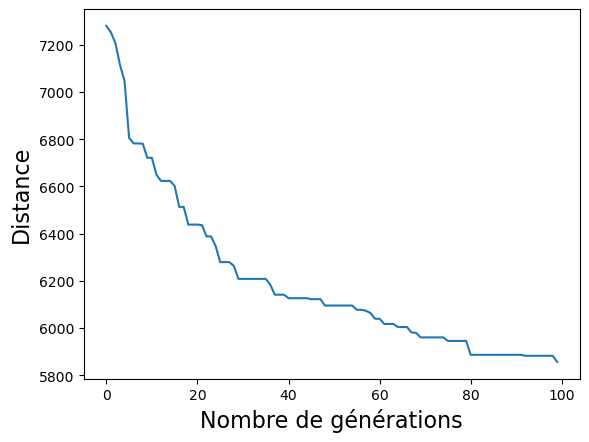

In [78]:
import matplotlib.pyplot as plt

random.seed(a=3)

taillePop = 100
nbGeneation = 100
tauxDeMutation = 0.2


mat = ForetMatAleatoire(100)

Graph = Foret(mat)

best_circuit, best_distance, evol = Graph.genetic_algorithm(nbGeneation, taillePop, tauxDeMutation)

print("Meilleur circuit :", best_circuit)
print("Meilleure distance :", best_distance)

plt.plot(range(len(evol)), evol)
plt.xlabel("Nombre de générations", fontsize=16)
plt.ylabel("Distance", fontsize=16)


Pour voir si notre solution est optimale on va tout d'abord commencer par la comparer avec un algorithme glouton.
On implémente un algorithme se basant sur la recherche d'une solution par plus proche voisin.

In [80]:
class Foret: #le graphe
    def __init__(self, matrice):
        self.foret = matrice    # matrice représentant la foret
        self.taille = len(matrice)
        self.sommets = [i for i in range(len(matrice))] # liste contenant les différents points d'alimentation
        self.lapins = [] # liste de la population
        
    def initialisationPopulation(self, taillePop):
        self.lapins = []
        for i in range(taillePop):
            circuit = list(range(1, self.taille))
            random.shuffle(circuit)
        self.lapins.append(Lapin(circuit))


    def genetic_algorithm(self, generations, taillePop, mutation_rate, elitism_ratio=0.1):
            self.initialisationPopulation(taillePop)
            evol = [] # liste qui contiendra le meilleur individu par génération

            for generation in range(generations):
                new_population = []
                best_distance = float('inf')

                # Trier la population par fitness (distance)
                self.lapins.sort(key=lambda x: x.calculate_distance(self.foret))

                # Garder les meilleurs individus (elitisme)
                num_elites = int(taillePop * elitism_ratio)
                elites = self.lapins[:num_elites]
                new_population.extend(elites)

                # Sélectionner les parents parmi les meilleures solutions
                while len(new_population) < taillePop:
                    parent1 = random.choice(self.lapins[:taillePop//2])  # Sélection parmi les meilleurs
                    parent2 = random.choice(self.lapins[:taillePop//2])
                    child = parent1.accouplement(parent2)

                    # Mutations
                    if random.random() < mutation_rate:
                        if random.random() < 0.5:
                            child.swap_mutation()  # Mutation par échange
                        else:
                            child.two_opt_mutation()  # Mutation par 2-opt

                    new_population.append(child)

                # Mise à jour de la population
                self.lapins = new_population

                # Calculer le meilleur individu de cette génération
                best_circuit = min(self.lapins, key=lambda x: x.calculate_distance(self.foret))
                best_distance = best_circuit.calculate_distance(self.foret)
                evol.append(best_distance)

            # Trouver le meilleur circuit global
            best_circuit = min(self.lapins, key=lambda x: x.calculate_distance(self.foret))
            best_distance = best_circuit.calculate_distance(self.foret)
            return best_circuit, best_distance, evol

    def gloutonDistance(self):
        dep = 0
        best = 0
        distance = 0
        parcouru = []
        for i in range(1,self.taille):
            bestD = float('inf')
            for j in range(1,self.taille):
                if(self.foret[dep][j]<bestD and j not in parcouru):
                    bestD = self.foret[dep][j]
                    best = j
            dep = best
            parcouru.append(best)
            distance += bestD
        distance += self.foret[dep][0]
        return distance

Meilleur circuit : [66, 10, 4, 56, 40, 44, 97, 59, 13, 43, 54, 30, 32, 23, 75, 37, 28, 26, 84, 21, 19, 70, 33, 78, 86, 25, 47, 89, 8, 14, 12, 99, 60, 38, 76, 42, 71, 68, 55, 93, 46, 67, 2, 61, 90, 74, 85, 15, 27, 69, 51, 57, 41, 79, 96, 92, 53, 18, 1, 87, 20, 49, 77, 98, 82, 65, 35, 94, 29, 81, 64, 45, 16, 22, 5, 73, 58, 52, 91, 17, 11, 80, 63, 36, 9, 83, 3, 6, 95, 50, 88, 48, 72, 7, 31, 34, 24, 62, 39]
Distance totale : 5801
Distance glouton : 5215


Text(0, 0.5, 'Distance')

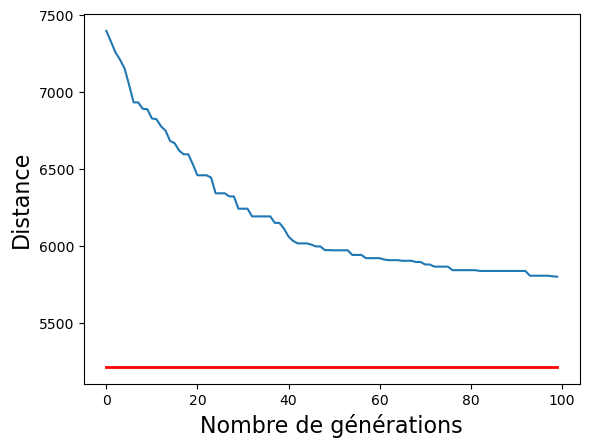

In [81]:
random.seed(a=3)


mat = ForetMatAleatoire(100)

Graph = Foret(mat)

glout = Graph.gloutonDistance()

best_circuit, best_distance, evol = Graph.genetic_algorithm(nbGeneation, taillePop, tauxDeMutation)
print("Meilleur circuit :", best_circuit)
print("Distance totale :", best_distance)
print("Distance glouton :", glout)

plt.plot(range(len(evol)), evol)
plt.plot([glout for x in range(len(evol))], 'r-', lw=2)
plt.xlabel("Nombre de générations", fontsize=16)
plt.ylabel("Distance", fontsize=16)

Augmentons le nombre de génération et la taille de la population.

Meilleur circuit : [63, 84, 90, 42, 17, 73, 44, 61, 50, 5, 67, 98, 80, 57, 6, 89, 41, 56, 12, 43, 24, 53, 21, 3, 65, 45, 85, 83, 23, 33, 69, 49, 82, 92, 31, 58, 14, 40, 11, 13, 47, 81, 91, 18, 97, 30, 95, 96, 1, 55, 94, 46, 28, 86, 7, 16, 75, 37, 9, 77, 38, 62, 71, 76, 35, 52, 74, 26, 20, 10, 88, 72, 66, 59, 27, 79, 2, 36, 51, 19, 70, 39, 4, 48, 8, 54, 99, 22, 34, 32, 64, 60, 78, 68, 25, 93, 87, 29, 15]
Distance totale : 5292
Distance glouton : 5215


Text(0, 0.5, 'Distance')

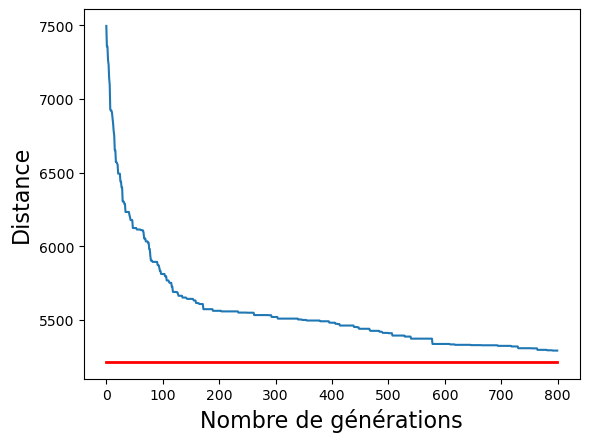

In [83]:
random.seed(a=3)

taillePop = 100
nbGeneation = 800

mat = ForetMatAleatoire(100)

Graph = Foret(mat)

glout = Graph.gloutonDistance()

best_circuit, best_distance, evol = Graph.genetic_algorithm(nbGeneation, taillePop, tauxDeMutation)
print("Meilleur circuit :", best_circuit)
print("Distance totale :", best_distance)
print("Distance glouton :", glout)

plt.plot(range(len(evol)), evol)
plt.plot([glout for x in range(len(evol))], 'r-', lw=2)
plt.xlabel("Nombre de générations", fontsize=16)
plt.ylabel("Distance", fontsize=16)

Après 800 générations notre programme n'obtient toujours pas une distance plus courte qu'un algorithme glouton. On pourrait ajouter des individus générés de manière glotonne à notre population initiale pour commencer de plus bas.
De plus le temps d'exécution est assez conséquent, il est nécessaire d'optimiser notre code pour améliorer ce temps. On va aussi réduire la taille de la population.

In [85]:
from functools import lru_cache

circuit_distance_cache = {}

class Foret: #le graphe
    def __init__(self, matrice):
        self.foret = matrice    # matrice représentant la foret
        self.taille = len(matrice)
        self.sommets = [i for i in range(len(matrice))] # liste contenant les différents points d'alimentation
        self.lapins = [] # liste de la population
        
    @lru_cache(maxsize=None)
    def initialisationPopulation(self, taillePop):
        self.lapins = []
        greed = self.greedy_start()
        for i in range(taillePop):
            if i < taillePop // 2:  # Moitié population avec glouton
                circuit = greed
            else:  # Moitié aléatoire
                circuit = list(range(1, self.taille))
                random.shuffle(circuit)
            self.lapins.append(Lapin(circuit))
            
    @lru_cache(maxsize=None)
    def greedy_start(self):
        dep = 0
        parcouru = [0]
        while len(parcouru) < self.taille:
            next_city = min((j for j in range(self.taille) if j not in parcouru),
                            key=lambda j: self.foret[dep][j])
            parcouru.append(next_city)
            dep = next_city
        return parcouru

    @lru_cache(maxsize=None)
    def genetic_algorithm(self, generations, taillePop, mutation_rate, elitism_ratio=0.1):
            self.initialisationPopulation(taillePop)
            evol = [] # liste qui contiendra le meilleur individu par génération

            for generation in range(generations):
                new_population = []
                best_distance = float('inf')

                # Trier la population par fitness (distance)
                self.lapins.sort(key=lambda x: x.calculate_distance(self.foret))

                # Garder les meilleurs individus (elitisme)
                num_elites = int(taillePop * elitism_ratio)
                elites = self.lapins[:num_elites]
                new_population.extend(elites)

                # Sélectionner les parents parmi les meilleures solutions
                while len(new_population) < taillePop:
                    parent1 = random.choice(self.lapins[:taillePop//2])  # Sélection parmi les meilleurs
                    parent2 = random.choice(self.lapins[:taillePop//2])
                    child = parent1.accouplement(parent2)

                    # Mutations
                    if random.random() < mutation_rate:
                        if random.random() < 0.5:
                            child.swap_mutation()  # Mutation par échange
                        else:
                            child.two_opt_mutation()  # Mutation par 2-opt

                    new_population.append(child)

                # Mise à jour de la population
                self.lapins = new_population

                # Calculer le meilleur individu de cette génération
                best_circuit = min(self.lapins, key=lambda x: x.calculate_distance(self.foret))
                best_distance = best_circuit.calculate_distance(self.foret)
                evol.append(best_distance)

            # Trouver le meilleur circuit global
            best_circuit = min(self.lapins, key=lambda x: x.calculate_distance(self.foret))
            best_distance = best_circuit.calculate_distance(self.foret)
            return best_circuit, best_distance, evol

    def gloutonDistance(self):
        dep = 0
        best = 0
        distance = 0
        parcouru = []
        for i in range(1,self.taille):
            bestD = float('inf')
            for j in range(1,self.taille):
                if(self.foret[dep][j]<bestD and j not in parcouru):
                    bestD = self.foret[dep][j]
                    best = j
            dep = best
            parcouru.append(best)
            distance += bestD
        distance += self.foret[dep][0]
        return distance

In [88]:
class Lapin:
    def __init__(self, circuit):
        self.circuit = circuit
        self.nombrePoints = len(circuit)
 
        
    def __repr__(self):
        return str(self.circuit)
  
           
    @lru_cache(maxsize=None)
    def accouplement(self, lapin):
        child = [None] * self.nombrePoints
        # Choisir les indices de croisement
        start, end = sorted(random.sample(range(self.nombrePoints), 2))
    
        # Copier la section du parent 1 dans le child
        child[start:end] = self.circuit[start:end]
    
        # Créer un set des gènes déjà utilisés dans le child
        used_genes = set(self.circuit[start:end])
    
        # Remplir les gènes restants avec ceux du parent 2
        current_pos = end % self.nombrePoints
        for point in lapin.circuit:
            if point not in used_genes:
                child[current_pos] = point
                used_genes.add(point)
                current_pos = (current_pos + 1) % self.nombrePoints
    
        return Lapin(child)
    
    
    # Mutation par échange
    @lru_cache(maxsize=None)
    def swap_mutation(self):
        size = (self.nombrePoints)
        idx1, idx2 = random.sample(range(size), 2)
        self.circuit[idx1], self.circuit[idx2] = self.circuit[idx2], self.circuit[idx1]
     
        
    @lru_cache(maxsize=None)
    def two_opt_mutation(self):
        """Perform a 2-opt mutation, which swaps two edges to reduce the path distance."""
        i, j = sorted(random.sample(range(1, len(self.circuit)), 2))
        self.circuit[i:j] = reversed(self.circuit[i:j])
    
    
    def calculate_distance(self, distance_matrix):
        # Convertir le circuit en tuple pour l'utiliser comme clé dans le dictionnaire
        circuit_tuple = tuple(self.circuit)

        # Vérifier si le circuit est déjà dans le cache
        if circuit_tuple in circuit_distance_cache:
            return circuit_distance_cache[circuit_tuple]
        
        # Si le circuit n'est pas dans le cache, le calculer
        distance = 0
        for i in range(len(self.circuit) - 1):
            distance += distance_matrix[self.circuit[i], self.circuit[i + 1]]
        
        # Ajouter la distance de retour au point de départ
        distance += distance_matrix[self.circuit[-1], self.circuit[0]]

        # Sauvegarder la distance dans le cache
        circuit_distance_cache[circuit_tuple] = distance
        return distance

Distance totale : 50137
Distance glouton : 50142
calculé en  6.59375 s


Text(0, 0.5, 'Distance')

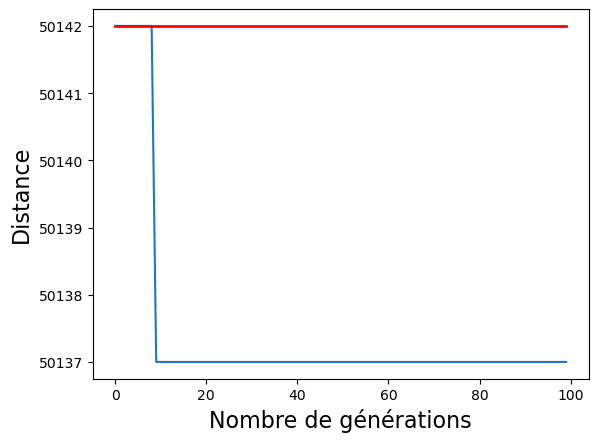

In [89]:
import time

random.seed(a=3)

taillePop = 100
nbGeneation = 100

mat = ForetMatAleatoire(1000)

Graph = Foret(mat)

glout = Graph.gloutonDistance()

start = time.process_time()

best_circuit, best_distance, evol = Graph.genetic_algorithm(nbGeneation, taillePop, tauxDeMutation)
print("Distance totale :", best_distance)
print("Distance glouton :", glout)

stop = time.process_time()
print("calculé en ", stop-start, 's')

plt.plot(range(len(evol)), evol)
plt.plot([glout for x in range(len(evol))], 'r-', lw=2)
plt.xlabel("Nombre de générations", fontsize=16)
plt.ylabel("Distance", fontsize=16)



Il nous faudrait un autre moyen pour juger si notre algorithme est optimale. Utilisons un supplex pour générer une borne inférieur qu'on comparera avec nos résultats.

In [91]:
from pulp import *

def borneinf(mat):
    # Variables
    sommets = list(range(len(mat)))  # Les sommets du graphe
    arcs = [(i, j) for i in sommets for j in sommets if i != j]  # Tous les arcs possibles, sauf les boucles

    # Variables de décision
    x = LpVariable.dicts('x', arcs, 0, 1, LpInteger)  # 1 si l'arc (i, j) est utilisé, sinon 0
    u = LpVariable.dicts('u', sommets, 0, len(sommets) - 1, LpInteger)  # Variables pour éliminer les sous-tours

    # Problème
    prob = LpProblem("TravelingSalesmanProblem", LpMinimize)

    # Fonction objective : minimiser la somme des distances parcourues
    prob += lpSum([x[i, j] * mat[i][j] for (i, j) in arcs]), "Minimizetraveldistance"

    # Contraintes
    # Chaque sommet doit être quitté exactement une fois
    for i in sommets:
        prob += lpSum([x[i, j] for j in sommets if i != j]) == 1, f"Leave{i}"

    # Chaque sommet doit être visité exactement une fois
    for j in sommets:
        prob += lpSum([x[i, j] for i in sommets if i != j]) == 1, f"Visit{j}"

    # Élimination des sous-tours (MTZ formulation)
    for i in sommets[1:]:
        for j in sommets[1:]:
            if i != j:
                prob += (
                    u[i] - u[j] + len(sommets) * x[i, j] <= len(sommets) - 1,
                    f"Subtour_{i}_{j}_{len(sommets)}"
                )

    # Résolution
    prob.solve()

    # Retourne la valeur de la fonction objective
    return value(prob.objective)

IntProgress(value=0, layout=Layout(width='100%'), max=50)

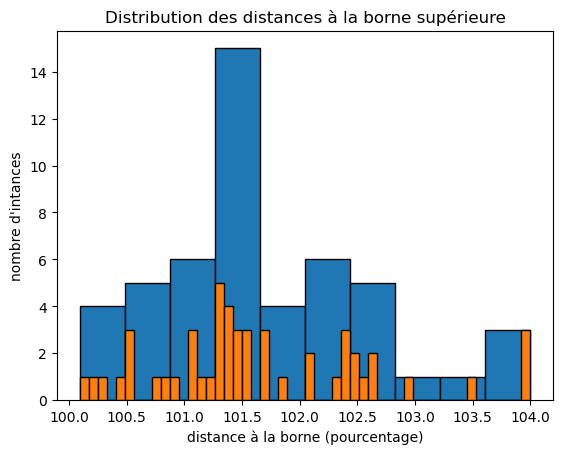

In [92]:
from collections import deque
from ipywidgets import IntProgress
from IPython.display import display
import time


start = time.process_time()

random.seed(a=3)
bornes = deque(())

nb_tests = 50

# on affiche la barre de progression
bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
display(bar)

for _ in range(nb_tests):
    # génération aléatoire de l'instance et calcul de  
    # sa borne supérieure.
    a = ForetMatAleatoire(20)
    borne = borneinf(a)                                                                  

    best_circuit, best_distance, evol = (Foret(a)).genetic_algorithm(100, 50, 0.2)
    distance = best_distance*100/borne                          
    bornes.append(distance)                             
    bar.value += 1                                    

# on cache la barre de progression
bar.close()

plt.hist(bornes, edgecolor = "black")                         
plt.xlabel("distance à la borne (pourcentage)")               
plt.ylabel("nombre d'intances")                               
plt.title("Distribution des distances à la borne supérieure") 
plt.hist(bornes, bins=50, edgecolor = "black"); 

# Implémentation de la contrainte fenêtres de temps

Il faut désormais que nous modifions légèrement notre programme afin qu'il prenne en compte les différentes fenetres de temps assignées aux villes.
Commençons par modifier nos classes afin de les adapter à la contrainte.

Pour modéliser cette contrainte, on appliquera un nombre de pénalité égal au nombre de ville visitées après leur fenêtres de temps pour chaque chemin. Si on arrive avant que la fenêtre soit ouverte, on attendra que la fenêtre s'ouvre.
Notre algorithme génétique cherchera d'abord à diminuer le nombre de pénalités puis dans un second temps faire baisser la distance parcourue.

In [95]:
circuit_temps_cache = {}

class Foret: #le graphe
    def __init__(self, matrice, fenetres):
        self.foret = matrice    # matrice représentant la foret
        self.taille = len(matrice)
        self.sommets = [i for i in range(len(matrice))] # liste contenant les différents points d'alimentation
        self.lapins = [] # liste de la population
        self.fenetres = fenetres # on ajoute un attributs fenetres qui sera une liste contenant les temps d'ouverture et de fermeture de chaque point

        
    @lru_cache(maxsize=None)
    def initialisationPopulation(self, taillePop):
        self.lapins = []
        greed = self.greedy_startTW()
        for i in range(taillePop):
            if (i < taillePop // 2 and False):  # Moitié population avec glouton
                circuit = greed
            else:  # Moitié aléatoire
                circuit = list(range(1, self.taille))
                random.shuffle(circuit)
            self.lapins.append(Lapin(circuit))

    
    @lru_cache(maxsize=None)
    def greedy_startTW(self):
        parcouru = []
        while len(parcouru) < self.taille-1:
            next_city = min((j for j in range(self.taille) if j not in parcouru and j != 0),
                            key=lambda j: self.fenetres[j][1])
            parcouru.append(next_city)
        return parcouru

        
    def gloutonDistanceTW(self):
        parcours = self.greedy_startTW()
        distance = Lapin(parcours).calculate_temps(self.foret, self.fenetres)
        return distance
            
    
    # Algorithme génétique pour le TSP
    @lru_cache(maxsize=None)
    def genetic_algorithmTW(self, generations, taillePop, mutation_rate, elitism_ratio=0.1):
        self.initialisationPopulation(taillePop)
        evol = [] # liste qui contiendra le meilleur individu par génération
        evolP = [] # liste de la penalite du meilleur individu
    
        for generation in range(generations):
            new_population = []
            best_temps = float('inf')
    
            # Trier la population par fitness (temps)
            self.lapins.sort(key=lambda x: (x.calculate_temps(self.foret, self.fenetres)[0], x.calculate_temps(self.foret, self.fenetres)[1]))
    
            # Garder les meilleurs individus (elitisme)
            num_elites = int(taillePop * elitism_ratio)
            elites = self.lapins[:num_elites]
            new_population.extend(elites)
    
            # Sélectionner les parents parmi les meilleures solutions
            while len(new_population) < taillePop:
                parent1 = random.choice(self.lapins[:taillePop//2])  # Sélection parmi les meilleurs
                parent2 = random.choice(self.lapins[:taillePop//2])
                child = parent1.accouplement(parent2)
    
                # Mutations
                if random.random() < mutation_rate:
                    if random.random() < 0.5:
                        child.swap_mutation()  # Mutation par échange
                    else:
                        child.two_opt_mutation()  # Mutation par 2-opt
    
                new_population.append(child)
    
            # Mise à jour de la population
            self.lapins = new_population
    
            # Calculer le meilleur individu de cette génération
            best_circuit = min(self.lapins, key=lambda x: (x.calculate_temps(self.foret, self.fenetres)[0], x.calculate_temps(self.foret, self.fenetres)[1]))
            best_temps = best_circuit.calculate_temps(self.foret, self.fenetres)
            evol.append(best_temps[1])
            evolP.append(best_temps[0])
    
        # Trouver le meilleur circuit global
        best_circuit = min(self.lapins, key=lambda x: (x.calculate_temps(self.foret, self.fenetres)[0], x.calculate_temps(self.foret, self.fenetres)[1]))
        best_temps = best_circuit.calculate_temps(self.foret, self.fenetres)
        return best_circuit, best_temps, evol, evolP

           
    
class Lapin:
    def __init__(self, circuit):
        self.circuit = circuit
        self.nombrePoints = len(circuit)
        self.status = 1 # 1 si le lapin est vivant
 
        
    def __repr__(self):
        return str(self.circuit)
  
           
    @lru_cache(maxsize=None)
    def accouplement(self, lapin):
        child = [None] * self.nombrePoints
        # Choisir les indices de croisement
        start, end = sorted(random.sample(range(self.nombrePoints), 2))
    
        # Copier la section du parent 1 dans le child
        child[start:end] = self.circuit[start:end]
    
        # Créer un set des gènes déjà utilisés dans le child
        used_genes = set(self.circuit[start:end])
    
        # Remplir les gènes restants avec ceux du parent 2
        current_pos = end % self.nombrePoints
        for point in lapin.circuit:
            if point not in used_genes:
                child[current_pos] = point
                used_genes.add(point)
                current_pos = (current_pos + 1) % self.nombrePoints
    
        return Lapin(child)
    
    
    # Mutation par échange
    @lru_cache(maxsize=None)
    def swap_mutation(self):
        size = (self.nombrePoints-1)
        idx1, idx2 = random.sample(range(size), 2)
        self.circuit[idx1], self.circuit[idx2] = self.circuit[idx2], self.circuit[idx1]
     
        
    @lru_cache(maxsize=None)
    def two_opt_mutation(self):
        """Perform a 2-opt mutation, which swaps two edges to reduce the path distance."""
        i, j = sorted(random.sample(range(1, len(self.circuit)), 2))
        self.circuit[i:j] = reversed(self.circuit[i:j])
    
    
    def calculate_temps(self, distance_matrix, fenetres):
        # Convertir le circuit en tuple pour l'utiliser comme clé dans le dictionnaire
        circuit_tuple = tuple(self.circuit)
        
        # Système de pénalité
        penalite = 0
    
        # Vérifier si le circuit est déjà dans le cache
        if circuit_tuple in circuit_temps_cache:
            # Retourne la valeur du cache comme tuple
            return circuit_temps_cache[circuit_tuple]
        
        # Si le circuit n'est pas dans le cache, le calculer
        temps = 0
        for i in range(len(self.circuit) - 1):
            # Ajouter le temps pour aller à la ville suivante
            temps += distance_matrix[self.circuit[i], self.circuit[i + 1]]
            
            # Cas où on doit attendre l'ouverture du point
            if fenetres[self.circuit[i + 1]][0] > temps:  # Si le temps est avant l'ouverture
                temps = fenetres[self.circuit[i + 1]][0]  # Attendre l'ouverture
            
            # Cas où on dépasse la fenêtre
            if temps > fenetres[self.circuit[i + 1]][1]:  # Si le temps dépasse la fenêtre
                penalite += 1
    
        # Ajouter la distance de retour au point de départ
        temps += distance_matrix[self.circuit[-1], self.circuit[0]]
    
        # Sauvegarder dans le cache un tuple (penalite, temps)
        circuit_temps_cache[circuit_tuple] = (penalite, temps)
    
        return penalite, temps

Modifions maintenant nos fonctions de création et d'importation de matrices.

In [97]:
def lire_coordonnees(fichier):
    with open(fichier, 'r') as f:
        lignes = f.readlines()
    
    # Extraire les coordonnées
    coordonnees = []
    fenetres = []
    for ligne in lignes:
        parts = ligne.strip().split()
        
        try:
            if(float(parts[0]) == 999): break
            x = float(parts[1])  # XCOORD
            y = float(parts[2])  # YCOORD
            coordonnees.append((x, y))
            f1 = float(parts[4])
            f2 = float(parts[5])
            fenetres.append((f1, f2))
        except (IndexError, ValueError):
            # Ignorer les lignes non valides
            continue

    return coordonnees, fenetres

def generer_matrice_distances(coordonnees):
    taille = len(coordonnees)
    matrice_distances = np.zeros((taille, taille))
    
    # Calcul des distances euclidiennes
    for i in range(taille):
        for j in range(i + 1, taille):
            x1, y1 = coordonnees[i]
            x2, y2 = coordonnees[j]
            distance = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
            matrice_distances[i][j] = distance
            matrice_distances[j][i] = distance  # Matrice symétrique
    
    return matrice_distances


def ForetMatAleatoire(taille, a=50, b=100):
    # on génère une matrice de distance aléatoire
    mat = np.random.randint(50, 100, (taille, taille)).astype(int)
    
    fen1 = random.randint(taille, 2*taille)
    fen2 = random.randint(0, (a+b)*taille/2)
    fen = []

    # On garde les distances symétriques et on met les diagonales à 0
    for i in range(taille):
        mat[i][i] = 0
        for j in range(i+1, taille):
            mat[j][i] = mat[i][j]
        fen.append((fen2, fen2+fen1))
        
            
    return mat, fen

Essayons notre algorithme sur un benchmark.

Meilleur circuit : [15, 5, 1, 9, 16, 19, 18, 17, 11, 10, 12, 6, 13, 7, 4, 2, 8, 3, 20, 14]
Meilleur temps : 347.2715452599408
Avec une pénalité de : 0
Temps glouton : 396.6557593645038
Avec une pénalité de : 0
calculé en  0.140625 s


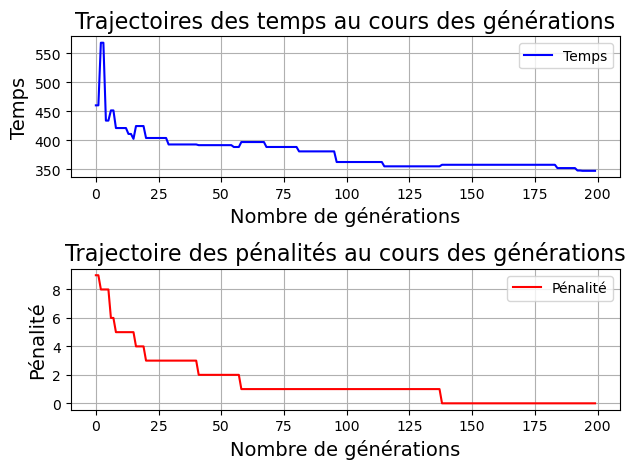

In [110]:
start = time.process_time()

random.seed(a=3)

coordonnees, fenetres = lire_coordonnees('n20w120.001.txt')
mat = generer_matrice_distances(coordonnees)

Graphe = Foret(mat, fenetres) 

glout = Graphe.gloutonDistanceTW()

evolPar = []
size = []


best_circuit, best_temps, evol, evolP = Graphe.genetic_algorithmTW(200, 100, 0.2)


print("Meilleur circuit :", best_circuit)
print("Meilleur temps :", best_temps[1])
print("Avec une pénalité de :", best_temps[0])
print("Temps glouton :", glout[1])
print("Avec une pénalité de :", glout[0])


stop = time.process_time()
print("calculé en ", stop-start, 's')

# Premier graphique : Trajectoire des distances
plt.subplot(2, 1, 1)  # 2 lignes, 1 colonne, 1er graphique
plt.plot(range(len(evol)), evol, label="Temps", color="blue")
plt.xlabel("Nombre de générations", fontsize=14)
plt.ylabel("Temps", fontsize=14)
plt.title("Trajectoires des temps au cours des générations", fontsize=16)
plt.legend()
plt.grid(True)




# Deuxième graphique : Trajectoire des pénalités
plt.subplot(2, 1, 2)  # 2 lignes, 1 colonne, 1er graphique
plt.plot(range(len(evolP)), evolP, label="Pénalité", color="red")
plt.xlabel("Nombre de générations", fontsize=14)
plt.ylabel("Pénalité", fontsize=14)
plt.title("Trajectoire des pénalités au cours des générations", fontsize=16)
plt.legend()
plt.grid(True)

# Afficher les deux graphes
plt.tight_layout()  # Ajuste automatiquement les espaces entre les graphes
plt.show()


# Analyse statistique

Faisons maintenant varier nos paramètres afin de savoir comment ils font varier notre résultat final.

### Nombre de générations :

calculé en  17.46875 s


Text(0, 0.5, 'Temps')

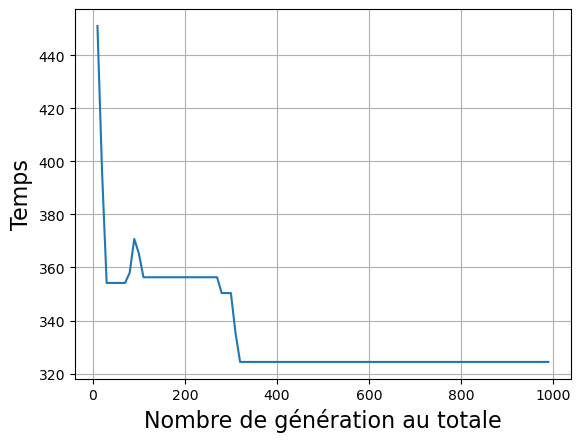

In [101]:
start = time.process_time()

random.seed(a=3)

coordonnees, fenetres = lire_coordonnees('n20w120.001.txt')
mat = generer_matrice_distances(coordonnees)

Graphe = Foret(mat, fenetres) 

glout = Graphe.gloutonDistanceTW()

evolPar = []
size = []

for i in range(10,1000,10):
    best_circuit, best_temps, evol, evolP = Graphe.genetic_algorithmTW(i, 20, 0.2)
    evolPar.append(best_temps[1]) #On ne regardera que le meilleur temps et on supposera la pénalité à 0
    size.append(i)



stop = time.process_time()
print("calculé en ", stop-start, 's')


plt.plot(size, evolPar)
plt.grid(True)
plt.xlabel("Nombre de génération au totale", fontsize=16)
plt.ylabel("Temps", fontsize=16)


### Taille de la population :

calculé en  14.796875 s


Text(0, 0.5, 'Temps')

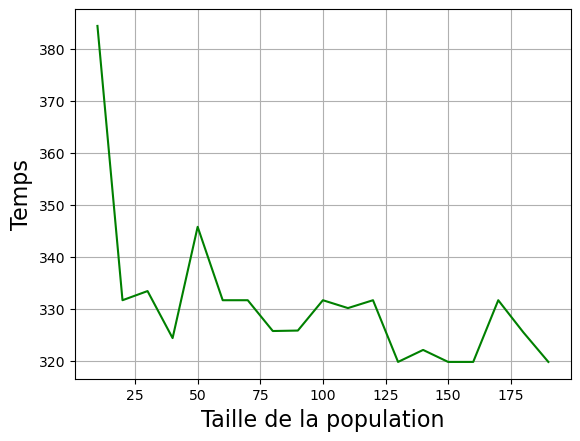

In [103]:
start = time.process_time()

random.seed(a=3)

coordonnees, fenetres = lire_coordonnees('n20w120.001.txt')
mat = generer_matrice_distances(coordonnees)

Graphe = Foret(mat, fenetres) 

glout = Graphe.gloutonDistanceTW()

evolPar = []
size = []

for i in range(10,200,10):
    best_circuit, best_temps, evol, evolP = Graphe.genetic_algorithmTW(400, i, 0.2)
    evolPar.append(best_temps[1]) #On ne regardera que le meilleur temps et on supposera la pénalité à 0
    size.append(i)

stop = time.process_time()
print("calculé en ", stop-start, 's')


plt.plot(size, evolPar, color='green')
plt.grid(True)
plt.xlabel("Taille de la population", fontsize=16)
plt.ylabel("Temps", fontsize=16)

### Taux de mutation :

calculé en  2.453125 s


Text(0, 0.5, 'Temps')

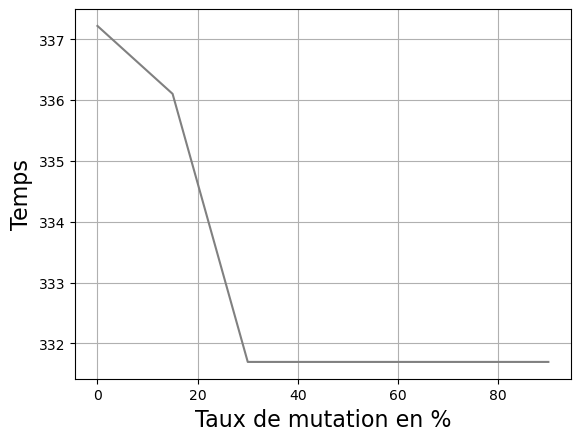

In [105]:
start = time.process_time()

random.seed(a=3)

coordonnees, fenetres = lire_coordonnees('n20w120.001.txt')
mat = generer_matrice_distances(coordonnees)

Graphe = Foret(mat, fenetres) 

glout = Graphe.gloutonDistanceTW()

evolPar = []
size = []

for i in range(0,100,15):
    best_circuit, best_temps, evol, evolP = Graphe.genetic_algorithmTW(200, 100, i/100)
    evolPar.append(best_temps[1]) #On ne regardera que le meilleur temps et on supposera la pénalité à 0
    size.append(i)

stop = time.process_time()
print("calculé en ", stop-start, 's')


plt.plot(size, evolPar, color='gray')
plt.grid(True)
plt.xlabel("Taux de mutation en %", fontsize=16)
plt.ylabel("Temps", fontsize=16)

### Taux d'élitisme :

calculé en  1.90625 s


Text(0, 0.5, 'Temps')

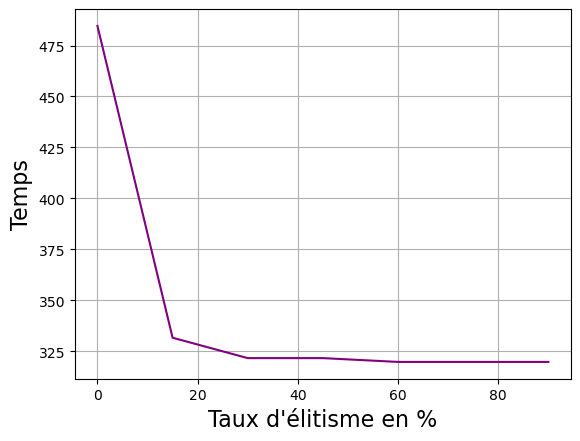

In [114]:
start = time.process_time()

random.seed(a=3)

coordonnees, fenetres = lire_coordonnees('n20w120.001.txt')
mat = generer_matrice_distances(coordonnees)

Graphe = Foret(mat, fenetres) 

glout = Graphe.gloutonDistanceTW()

evolPar = []
size = []

for i in range(0,100,15):
    best_circuit, best_temps, evol, evolP = Graphe.genetic_algorithmTW(200, 100, 0.2, i/100)
    evolPar.append(best_temps[1]) #On ne regardera que le meilleur temps et on supposera la pénalité à 0
    size.append(i)

stop = time.process_time()
print("calculé en ", stop-start, 's')


plt.plot(size, evolPar, color='purple')
plt.grid(True)
plt.xlabel("Taux d'élitisme en %", fontsize=16)
plt.ylabel("Temps", fontsize=16)

# Tests de performance:

Testons maintenant notre algorithme pour de grandes instances. Essaoyons avec 1000 villes.

In [116]:


start = time.process_time()
mat, fen = ForetMatAleatoire(1000)


Graphe = Foret(mat, fen)

evolPar = []
size = []


best_circuit, best_temps, evol, evolP = Graphe.genetic_algorithmTW(400, 100, 0.4)
print("Meilleur temps :", best_temps[1])
print("Avec une pénalité de :", best_temps[0])



stop = time.process_time()
print("calculé en ", stop-start, 's')


# Premier graphique : Trajectoire des distances
plt.subplot(2, 1, 1)  # 2 lignes, 1 colonne, 1er graphique
plt.plot(range(len(evol)), evol, label="Temps", color="blue")
plt.xlabel("Nombre de générations", fontsize=14)
plt.ylabel("Distance", fontsize=14)
plt.title("Trajectoires des temps au cours des générations", fontsize=16)
plt.legend()
plt.grid(True)

# Deuxième graphique : Trajectoire des pénalités
plt.subplot(2, 1, 2)  # 2 lignes, 1 colonne, 2e graphique
plt.plot(range(len(evolP)), evolP, label="Pénalité", color="red")
plt.xlabel("Nombre de générations", fontsize=14)
plt.ylabel("Pénalité", fontsize=14)
plt.title("Trajectoire des pénalités au cours des générations", fontsize=16)
plt.legend()
plt.grid(True)

# Afficher les deux graphes
plt.tight_layout()  # Ajuste automatiquement les espaces entre les graphes
plt.show()


TypeError: 'float' object cannot be interpreted as an integer